# Exploración de datos con pandas


Vamos a leer una tabla con pandas desde una URL que contiene información geográfica básica de los países del mundo y realizaremos un analisis de estos datos, usando la liberia pandas y matplotlib.

## Algunas configuraciones antes de comenzar

In [1]:
import pandas as pd

## Obtención de los datos

In [2]:
# Leer las tablas en pandas
all_tables = pd.read_html('https://www.geonames.org/countries/')

In [3]:
len(all_tables)

2

In [4]:
all_tables[0].head()

,0,1
0,GeoNames Home | Postal Codes | Download / Webs...,search login


In [5]:
all_tables[1].head()

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NaN


Como hemos visto la información de interés se encuentra en el segundo elemento.

In [6]:
all_tables[1].columns.values.tolist()

['ISO-3166 alpha2',
 'ISO-3166 alpha3',
 'ISO-3166 numeric',
 'fips',
 'Country',
 'Capital',
 'Area in km²',
 'Population',
 'Continent']

In [7]:
data = all_tables[1]

## Exploración de datos

Podemos ordenar el dataframe por paises de menor a mayor area

In [8]:
data.sort_values('Area in km²').head()

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
231,UM,UMI,581,NaN,U.S. Outlying Islands,NaN,0.0,0,OC
235,VA,VAT,336,VT,Vatican City,Vatican City,0.4,921,EU
137,MC,MCO,492,MN,Monaco,Monaco,1.9,38682,EU
82,GI,GIB,292,GI,Gibraltar,Gibraltar,6.5,33718,EU
219,TK,TKL,772,TL,Tokelau,NaN,10.0,1466,OC


Tambien podemos ordenar de mayor a menor, por la variable "population"

In [9]:
data.sort_values('Population').head()

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
231,UM,UMI,581,NaN,U.S. Outlying Islands,NaN,0.0,0,OC
33,BV,BVT,74,BV,Bouvet Island,NaN,49.0,0,AN
95,HM,HMD,334,HM,Heard and McDonald Islands,NaN,412.0,0,AN
8,AQ,ATA,10,AY,Antarctica,NaN,14000000.0,0,AN
89,GS,SGS,239,SX,South Georgia and South Sandwich Islands,Grytviken,3903.0,30,AN


Incluso podemos ordenar por mas de dos variables o nombres de columna

In [10]:
data.sort_values(['Area in km²', 'Population']).tail()

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
47,CN,CHN,156,CH,China,Beijing,9596960.0,1411778724,AS
232,US,USA,840,US,United States,Washington,9629091.0,327167434,NaN
37,CA,CAN,124,CA,Canada,Ottawa,9984670.0,37058856,NaN
8,AQ,ATA,10,AY,Antarctica,NaN,14000000.0,0,AN
190,RU,RUS,643,RS,Russia,Moscow,17100000.0,144478050,EU


Veamos la cantidas de registros.

.info() Muestra información sobre un DataFrame, incluido el tipo de índice y las columnas, valores no nulos y tipo de dato

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ISO-3166 alpha2   249 non-null    object 
 1   ISO-3166 alpha3   250 non-null    object 
 2   ISO-3166 numeric  250 non-null    int64  
 3   fips              247 non-null    object 
 4   Country           250 non-null    object 
 5   Capital           244 non-null    object 
 6   Area in km²       250 non-null    float64
 7   Population        250 non-null    int64  
 8   Continent         209 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 17.7+ KB


Veamos un poco sobre la naturaleza de los datos

.describe() Muestra medidas estadisticas que incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo el valor NaN.

In [12]:
data.describe()

,ISO-3166 numeric,Area in km²,Population
count,250.000000,2.500000e+02,2.500000e+02
mean,432.100000,5.996369e+05,3.045974e+07
std,253.958528,1.911821e+06,1.286486e+08
min,0.000000,0.000000e+00,0.000000e+00
25%,215.000000,1.174750e+03,1.965225e+05
50%,432.000000,6.489450e+04,4.742677e+06
75%,650.500000,3.726315e+05,1.809831e+07
max,894.000000,1.710000e+07,1.411779e+09


Veamos la cantidad de datos por contienentes dados. Mostraremos los unicos que trae el dataframe

In [13]:
data["Continent"].unique().tolist()

['EU', 'AS', nan, 'AF', 'AN', 'SA', 'OC']

Hagamos un agrupado por contienente para saber la cantidad de paises que tiene cada uno

In [14]:
agg_continents = data.groupby(["Continent"]).size().reset_index(name='total_countries')

display(agg_continents)

,Continent,total_countries
0,AF,58
1,AN,5
2,AS,51
3,EU,53
4,OC,28
5,SA,14


Viendo un diagrama de caja del area total de cada continente (solo para divertirnos con la información un poco)

<Axes: title={'center': 'Area in km²'}, xlabel='Continent'>

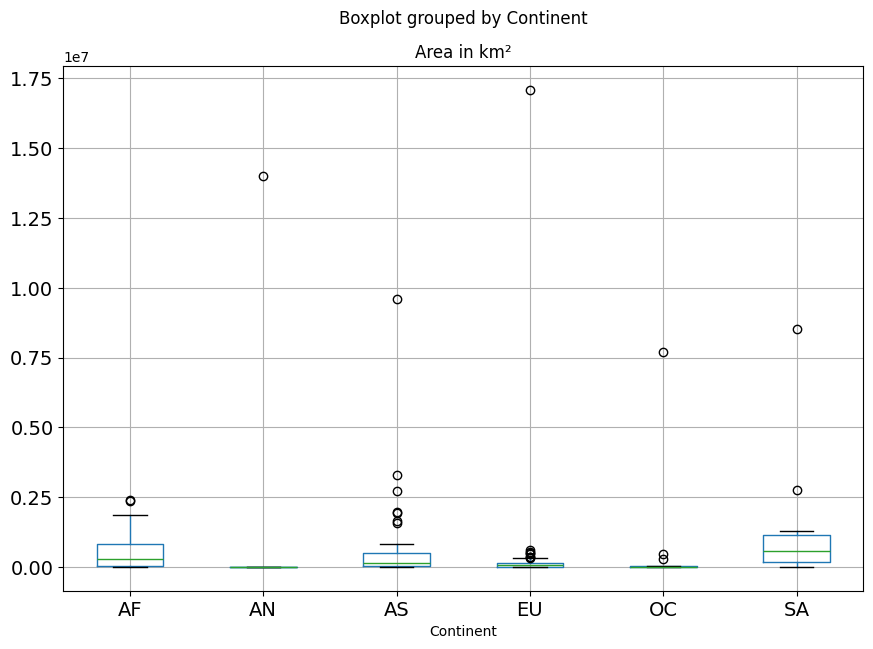

In [15]:
data.boxplot(column="Area in km²",by="Continent",figsize=(10,7),fontsize=14)

Encontremos los paises mas grandes de cada continente

In [16]:
max_area = data.groupby('Continent')['Area in km²'].max().reset_index(name='area')

display(max_area)

,Continent,area
0,AF,2381740.0
1,AN,14000000.0
2,AS,9596960.0
3,EU,17100000.0
4,OC,7686850.0
5,SA,8511965.0


In [17]:
area_country_continent = pd.merge(data, max_area, left_on='Area in km²', right_on='area', how='inner')

display(area_country_continent[['Continent_x','Country','area']])

,Continent_x,Country,area
0,AN,Antarctica,14000000.0
1,OC,Australia,7686850.0
2,SA,Brazil,8511965.0
3,AS,China,9596960.0
4,AF,Algeria,2381740.0
5,EU,Russia,17100000.0


Seleccionemos los primeros 10 paises con mayor población en Asia, que su población sea mayor a 835000 personas y que su capital empieze con la letra p

In [18]:
display(data[ (data["Continent"] == "AS") & (data["Population"]>835000) & (data["Capital"].str.startswith("P")) ])

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
116,KH,KHM,116,CB,Cambodia,Phnom Penh,181040.0,16249798,AS
120,KP,PRK,408,KN,North Korea,Pyongyang,120540.0,25549819,AS


Viendo un diagrama de caja de la población total por continente (solo para divertirnos con la información un poco)

<Axes: title={'center': 'Population'}, xlabel='Continent'>

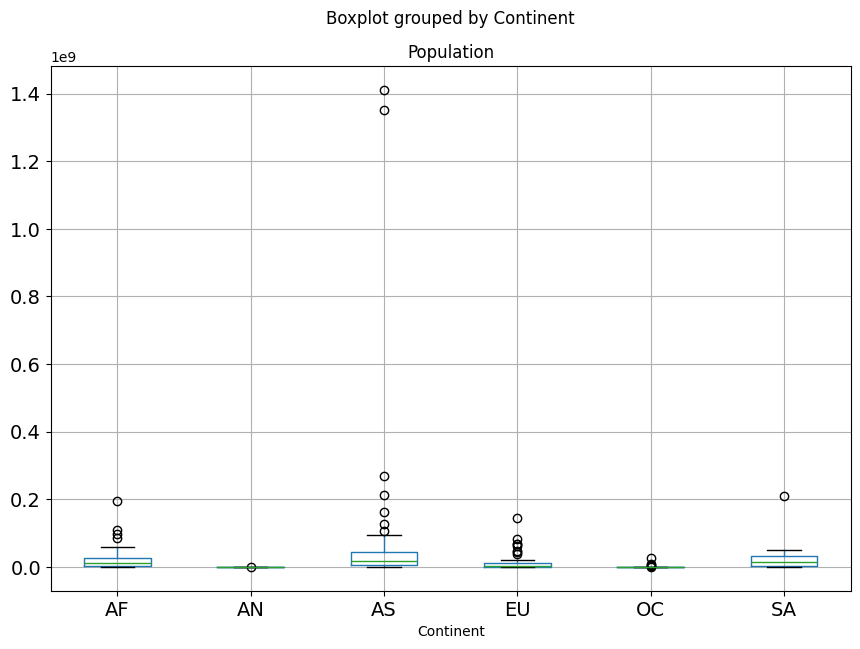

In [19]:
data.boxplot(column="Population",by="Continent",figsize=(10,7),fontsize=14)